In [155]:
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score

from task3_1 import preprocess_star_dataset, preprocess_gwp_dataset

In [156]:
def evaluate_clustering(X, Y, Y_pred):
    print('Accuracy: ', accuracy_score(Y, Y_pred))
    print('Silhouette Score: ', silhouette_score(X, Y_pred))
    print('Davies-Bouldin Index: ', davies_bouldin_score(X, Y_pred))
    print('Calinski-Harabasz Index: ', calinski_harabasz_score(X, Y_pred))

In [184]:
def plot_clusters(X, Y, Y_pred, cmap):
    # Apply PCA and transform the data to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Scatter plot for the clusters created by K-means
    ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=[cmap[pred] for pred in Y_pred])
    ax[0].set_title('K-means Clusters')

    # Scatter plot for the actual labels
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=[cmap[actual] for actual in Y])
    ax[1].set_title('Actual Labels')

    plt.show()

## Star Dataset

In [66]:
star_X, star_Y = preprocess_star_dataset('datasets/star_assessment.csv')

#### Cluster the star dataset using Mini Batch K-means

In [232]:
star_km = KMeans(n_clusters=3, n_init='auto')
star_km_Y_pred = star_km.fit_predict(star_X)

In [233]:
print('Accuracy: ', accuracy_score(star_Y, star_km_Y_pred))

Accuracy:  0.5181572891967341


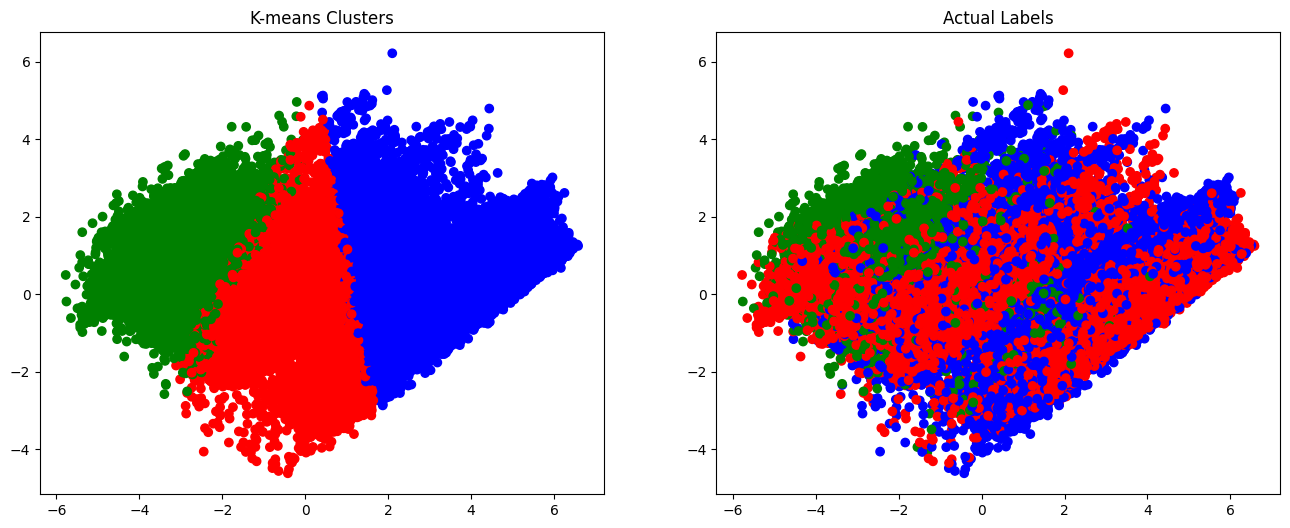

In [234]:
plot_clusters(star_X, star_Y, star_km_Y_pred, {0: 'red', 1: 'green', 2: 'blue'})

In [235]:
print('Silhouette Score: ', silhouette_score(star_X, star_km_Y_pred))
print('Davies-Bouldin Index: ', davies_bouldin_score(star_X, star_km_Y_pred))
print('Calinski-Harabasz Index: ', calinski_harabasz_score(star_X, star_km_Y_pred))

Silhouette Score:  0.37679681929187964
Davies-Bouldin Index:  1.047380515678173
Calinski-Harabasz Index:  83565.48504977407


#### Cluster the star dataset using DBSCAN

In [150]:
star_dbscan = DBSCAN()
star_dbscan_Y_pred = star_dbscan.fit_predict(star_X)

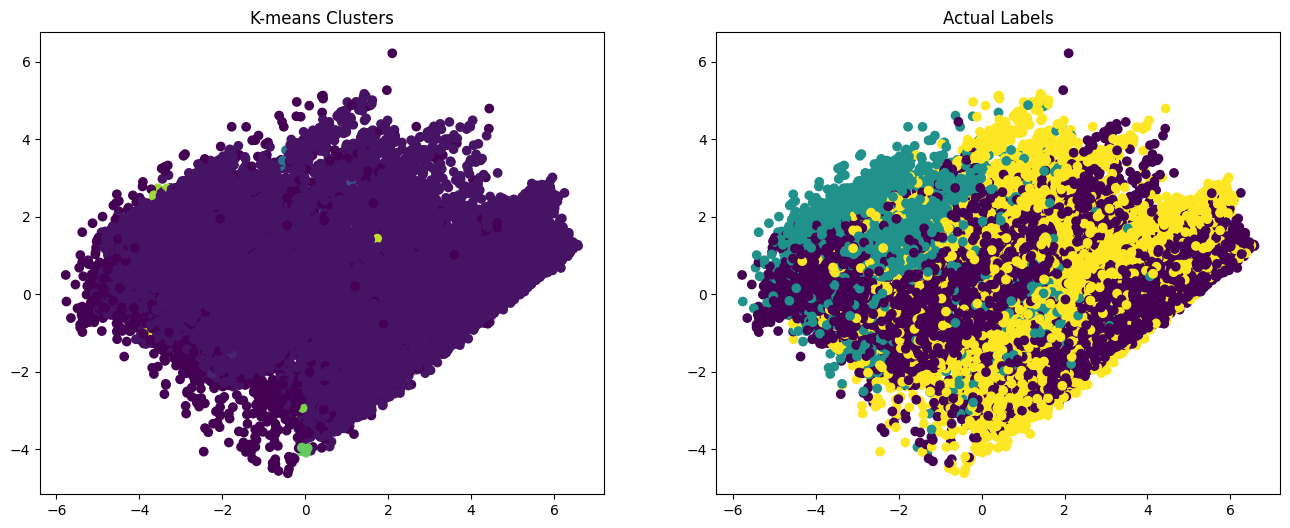

In [151]:
plot_clusters(star_X, star_Y, star_dbscan_Y_pred, {0: 'red', 1: 'green', 2: 'blue'})

In [152]:
print('Accuracy: ', accuracy_score(star_Y, star_dbscan_Y_pred))

Accuracy:  0.6349152581967692


In [154]:
print('Silhouette Score: ', silhouette_score(star_X, star_dbscan_Y_pred))
print('Davies-Bouldin Index: ', davies_bouldin_score(star_X, star_dbscan_Y_pred))
print('Calinski-Harabasz Index: ', calinski_harabasz_score(star_X, star_dbscan_Y_pred))

Silhouette Score:  -0.3773077766203028
Davies-Bouldin Index:  1.352457438772459
Calinski-Harabasz Index:  55.11897049534208


## GWP Dataset

In [28]:
gwp_X, gwp_Y = preprocess_gwp_dataset('datasets/gwp_assessment.csv')

#### Cluster the GWP dataset using K-means

In [36]:
mbkm2 = KMeans(n_clusters=3, batch_size=24*256)

In [37]:
gwp_Y_pred = mbkm2.fit_predict(gwp_X)

C:\Users\camer\IdeaProjects\coc131-cw\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
from sklearn.metrics import silhouette_score

print("Inertia: ", mbkm2.inertia_)
print("Silhouette Score: ", silhouette_score(gwp_x_train, mbkm2.labels_))

Inertia:  2091.2841864096213
Silhouette Score:  0.415818456417125
